<a href="https://colab.research.google.com/github/vivalladarez/crm-data-analysis/blob/main/crm_campaign_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Overview**


---

### Problemática
A empresa enfrenta o desafio de melhorar significativamente a rentabilidade de suas campanhas de marketing direto. Para isso, é necessário identificar o público certo, reduzir desperdícios de recursos e implementar uma abordagem baseada em dados que maximize o lucro e gere confiança nos métodos quantitativos.

### Objetivo

**Objetivo Principal**: Desenvolver um modelo preditivo que maximize o lucro da próxima campanha de marketing direto.

**Objetivo Secundário**: Fornecer insights detalhados sobre o perfil dos clientes que compraram o gadget, facilitando ações de marketing futuras.


### Features do Dataset

1. **ID**: Identificador único do cliente.
2. **Year_Birth**: Ano de nascimento do cliente.
3. **Education**: Nível de educação do cliente.
4. **Marital_Status**: Estado civil do cliente.
5. **Income**: Renda familiar anual do cliente.
6. **Kidhome**: Número de crianças pequenas no lar do cliente.
7. **Teenhome**: Número de adolescentes no lar do cliente.
8. **Dt_Customer**: Data em que o cliente foi registrado.
9. **Recency**: Número de dias desde a última compra do cliente.
10. **MntWines**: Gasto em vinhos nos últimos dois anos.
11. **MntFruits**: Gasto em frutas nos últimos dois anos.
12. **MntMeatProducts**: Gasto em produtos de carne nos últimos dois anos.
13. **MntFishProducts**: Gasto em produtos de peixe nos últimos dois anos.
14. **MntSweetProducts**: Gasto em doces nos últimos dois anos.
15. **MntGoldProds**: Gasto em produtos "gold" nos últimos dois anos.
16. **NumDealsPurchases**: Número de compras com desconto realizadas.
17. **NumWebPurchases**: Número de compras realizadas pelo web site.
18. **NumCatalogPurchases**: Número de compras realizadas usando o catálogo.
19. **NumStorePurchases**: Número de compras realizadas direto na loja.
20. **NumWebVisitsMonth**: Número de visitas ao site no último mês.
21. **AcceptedCmp3**: 1 se o cliente aceito a oferta na terceira campanha, 0 caso contrário.
22. **AcceptedCmp4**: 1 se o cliente aceito a oferta na quarta campanha, 0 caso contrário.
23. **AcceptedCmp5**: 1 se o cliente aceito a oferta na quinta campanha, 0 caso contrário.
24. **AcceptedCmp1**: 1 se o cliente aceito a oferta na primeira campanha, 0 caso contrário.
25. **AcceptedCmp2**: 1 se o cliente aceito a oferta na segunda campanha, 0 caso contrário.
26. **Complain**: 1 se o cliente reclamou nos últimos dois anos.
27. **Z_CostContact**: Custo de contato por campanha (constante)
28. **Z_Revenue**: Receita gerada por campanha (constante)
29. **Response**: Resposta à última campanha (1 - Sim, 0 - Não)



## **Análise Exploratória dos Dados (EDA)**

### Setup

In [46]:
!pip install imbalanced-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from datetime import datetime
from datetime import timedelta
from google.colab import files
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#dataset
base = pd.read_csv ('https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/refs/heads/master/ml_project1_data.csv')
base.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

###**I. Análise Descritiva**
- Income: O campo Income possui 24 valores não declarados (count = 2216 vs. 2240 para outras colunas). Além disso, o valor máximo de 666.666 é muito alto, o que indica a presença de outliers ou clientes com rendas extremamente altas.

- Year_Birth: os valores indicam que a maioria dos clientes no dataset nasceu entre 1959 e 1977, com uma média de nascimento em 1968. No entanto, o valor mínimo de 1893 e o máximo de 1996 indicam a presença de alguns outliers (erros no cadastramento).

- Z_CostContact e Z_Revenue: apresentam valores fixos (std = 0.0), indicando que são constantes para todas as observações e limitando a analise

- Education e Marital_Status são variáveis categóricas. Para uma análise mais eficaz, é possível convertê-las para variáveis numéricas.

- Year_Birth e Dt_Customer: convertendo as informações de Year_Birth e Dt_Customer em idade e tempo desde o cadastramento, é possivel extrair variáveis derivadas que são mais interpretáveis e úteis para análises e modelos preditivos.


In [21]:
base.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

###**II. Tratamento de Dados**

**Income:**

- Tratamento de Valores Ausentes: os valores ausentes da coluna Income foram substituidos com a mediana da variável, já que a mediana é menos sensível a outliers.

- Detecção e Remoção de Outliers: Foi utilizado método IQR (Intervalo entre Quartis) para detectar outliers. Assim, os valores que ficam fora do intervalo de [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] são considerados outliers e removidos.

**Year_Birth:**
- Remoção de valores inconsistentes (anos antes de 1900) para evitar a presença de erros de entrada de dados.

**Z_CostContact e Z_Revenue**
- Foram removidas do dataframe, por não trazerem informações uteis ao conjunto.

**Education e Marital_Status**
- Para a tranformação numerica das variáveis categóricas utilizou-se o método de mapeamento .map() do Pandas.



In [22]:
# Substituindo valores ausentes pela mediana
print(f"Valores ausentes em 'Income' antes da substituição: {base['Income'].isna().sum()}")

base['Income'] = base['Income'].fillna(base['Income'].median())

print(f"Valores ausentes em 'Income' pós tratamento: {base['Income'].isna().sum()}")

Valores ausentes em 'Income' antes da substituição: 24
Valores ausentes em 'Income' pós tratamento: 0


In [23]:
# Removendo outliers com base no Intervalo entre Quartis

Q1 = base['Income'].quantile(0.25)
Q3 = base['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

outliers_before = base[(base['Income'] < lower_bound) | (base['Income'] > upper_bound)].shape[0]
print(f'Outliers antes da remoção: {outliers_before}')

base = base[(base['Income'] >= lower_bound) & (base['Income'] <= upper_bound)]

outliers_after = base[(base['Income'] < lower_bound) | (base['Income'] > upper_bound)].shape[0]
print(f'Outliers após a remoção: {outliers_after}')

Lower Bound: -13587.75
Upper Bound: 117416.25
Outliers antes da remoção: 8
Outliers após a remoção: 0


- Lower Bound: -14525.5, como o valor de Income é uma renda anual (que não pode ser negativa), esse limite é teoricamente irrelevante

- Upper Bound (118350.5): Este valor é o limite superior para a distribuição de Income. Qualquer valor acima de 118350.5 seria considerado um outlier.

In [24]:
# Removendo anos de nascimento antes de 1900 (considerando um erro)
total_antes = base.shape[0]

base = base[base['Year_Birth'] > 1900]

total_depois = base.shape[0]

removed = total_antes - total_depois
print(f'Total de registros removidos: {removed}')

Total de registros removidos: 3


In [25]:
# Removendo constantes
base.drop(columns=['Z_CostContact'], inplace=True)
base.drop(columns=['Z_Revenue'], inplace=True)

In [26]:
# Convertendo variáveis categóricas para numéricas
base['Education'] = base['Education'].map({'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4, '2n Cycle': 3})
base['Marital_Status'] = base['Marital_Status'].map({'Single': 1, 'Together': 2, 'Married': 3, 'Divorced': 4, 'Widow': 5, 'Alone': 6, 'Absurd': 7, 'YOLO': 8})


In [27]:
# Converter Year_Birth em Idade e Dt_Customer em número de dias desde o cadastro
ano_atual = datetime.now().year
base['Age'] = ano_atual - base['Year_Birth']

base['Dt_Customer'] = pd.to_datetime(base['Dt_Customer'])
base['Registration_days'] = (datetime.now() - base['Dt_Customer']).dt.days

df = base.drop(columns=['Year_Birth', 'Dt_Customer'])
df_ml = df

In [28]:
df.describe()

ID    Education  Marital_Status         Income      Kidhome  \
count   2229.000000  2229.000000     2229.000000    2229.000000  2229.000000   
mean    5589.296097     2.663078        2.496635   51619.504262     0.444594   
std     3244.840538     0.838902        1.074685   20601.216248     0.538636   
min        0.000000     1.000000        1.000000    1730.000000     0.000000   
25%     2829.000000     2.000000        2.000000   35416.000000     0.000000   
50%     5455.000000     2.000000        3.000000   51381.500000     0.000000   
75%     8420.000000     3.000000        3.000000   68118.000000     1.000000   
max    11191.000000     4.000000        8.000000  113734.000000     2.000000   

          Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  \
count  2229.000000  2229.000000  2229.000000  2229.000000      2229.000000   
mean      0.507402    49.106326   304.991476    26.348587       165.283984   
std       0.544735    28.946476   336.761943    39.764060       219.336589   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.000000    24.000000    24.000000     2.000000        16.000000   
50%       0.000000    49.000000   176.000000     8.000000        67.000000   
75%       1.000000    74.000000   505.000000    33.000000       231.000000   
max       2.000000    99.000000  1493.000000   199.000000      1725.000000   

       ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count  ...        2229.000000   2229.000000   2229.000000   2229.000000   
mean   ...           5.334231      0.073127      0.074921      0.072678   
std    ...           2.414981      0.260403      0.263324      0.259666   
min    ...           0.000000      0.000000      0.000000      0.000000   
25%    ...           3.000000      0.000000      0.000000      0.000000   
50%    ...           6.000000      0.000000      0.000000      0.000000   
75%    ...           7.000000      0.000000      0.000000      0.000000   
max    ...          20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response          Age  \
count   2229.000000   2229.000000  2229.000000  2229.000000  2229.000000   
mean       0.064603      0.013459     0.008973     0.149843    56.111261   
std        0.245879      0.115255     0.094319     0.356998    11.707430   
min        0.000000      0.000000     0.000000     0.000000    29.000000   
25%        0.000000      0.000000     0.000000     0.000000    48.000000   
50%        0.000000      0.000000     0.000000     0.000000    55.000000   
75%        0.000000      0.000000     0.000000     0.000000    66.000000   
max        1.000000      1.000000     1.000000     1.000000    85.000000   

       Registration_days  
count        2229.000000  
mean         4211.777479  
std           202.248700  
min          3858.000000  
25%          4039.000000  
50%          4214.000000  
75%          4387.000000  
max          4557.000000  

[8 rows x 27 columns]

### **III. Visualizações**


Até este ponto, já analisamos o resumo estatístico e a distribuição das variáveis. Agora, utilizaremos analises exploratórias para identificar padrões no comportamento de compra e relacionar características dos clientes com suas preferências.


 #### **Quem são os clientes?**

##### **Como a idade dos clientes se distribui entre níveis educacionais e renda?**

* A faixa etária dos indivíduos varia de 29 a 85 anos, com a maioria concentrada entre 48 e 66 anos. A renda mínima é de 1.730, e a máxima atinge 113.734, indicando uma grande desigualdade no rendimento.
* Em termos de escolaridade, a maior parte dos indivíduos possui Graduation (Nível 2), representando cerca de 50% da amostra, seguido por Master (Nível 3) e PhD (Nível 4). O Basic (Nível 1) é o nível educacional menos comum, com apenas 54 pessoas, evidenciando que a maioria tem formação educacional mais avançada.

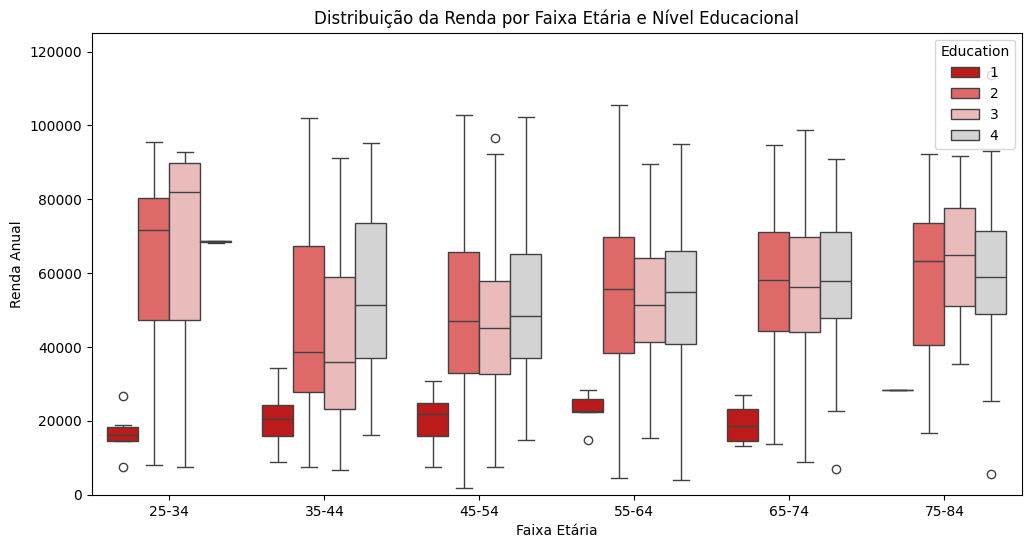

In [29]:
# Boxplot para visualizar a distribuição de Renda e Faixa Etária por Education com cores personalizadas
colors = ['#D70000', '#F15656', '#F1B3B3', '#D3D3D3']

bins = list(range(25, df['Age'].max() + 10, 10))
labels = [f'{i}-{i+9}' for i in range(25, df['Age'].max(), 10)]
df['Age_Faixa'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Faixa', y='Income', hue='Education', data=df, palette=colors)

plt.ylim(0, df['Income'].max() * 1.1)

plt.title('Distribuição da Renda por Faixa Etária e Nível Educacional')
plt.xlabel('Faixa Etária')
plt.ylabel('Renda Anual')

plt.show()

##### **Qual a distribuição entre Estado Civil e Filhos?**

* A faixa etária dos indivíduos varia de 29 a 85 anos, com a maioria concentrada entre 48 e 66 anos. A renda mínima é de 1.730, e a máxima atinge 113.734, indicando uma grande desigualdade no rendimento.
* Em termos de escolaridade, a maior parte dos indivíduos possui Graduation (Nível 2), representando cerca de 50% da amostra, seguido por Master (Nível 3) e PhD (Nível 4). O Basic (Nível 1) é o nível educacional menos comum, com apenas 54 pessoas, evidenciando que a maioria tem formação educacional mais avançada.

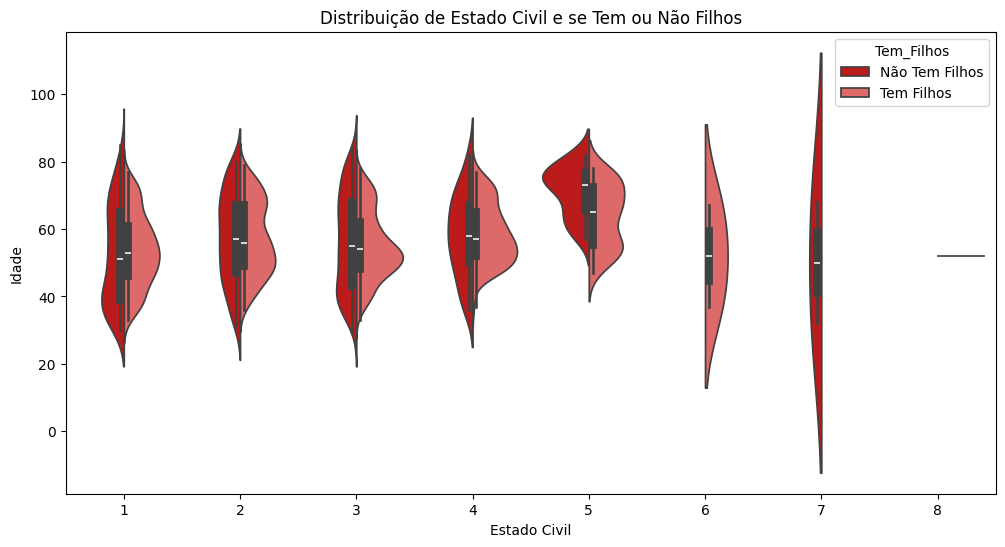

In [30]:
#Distribuição Estado Civil e se Tem ou Não Filho

colors = ['#D70000', '#F15656']

df['Tem_Filhos'] = df.apply(lambda row: 'Tem Filhos' if row['Teenhome'] > 0 or row['Kidhome'] > 0 else 'Não Tem Filhos', axis=1)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Marital_Status', y='Age', hue='Tem_Filhos', data=df, split=True, palette=colors)

plt.title('Distribuição de Estado Civil e se Tem ou Não Filhos')
plt.xlabel('Estado Civil')
plt.ylabel('Idade')

plt.show()

##### **Quais as caracteristicas dos clientes dispostos a comprar o gadget?**

1. A maioria dos clientes pertence ao Estado Civil 1 (single), especialmente com Educação 2 (Gaduation).
2. Baixa adesão no Estado Civil 2 com Educação 1: Apenas 2 clientes, indicando menor engajamento desse grupo.
3. Faixa etária 46-60 anos é o destaque em quase todas as faixas de renda. Com destaque para clientes com a renda “Baixa”
4. Potencial em renda alta: Clientes 31-45 anos com renda "Alta" têm bom engajamento e poder aquisitivo.


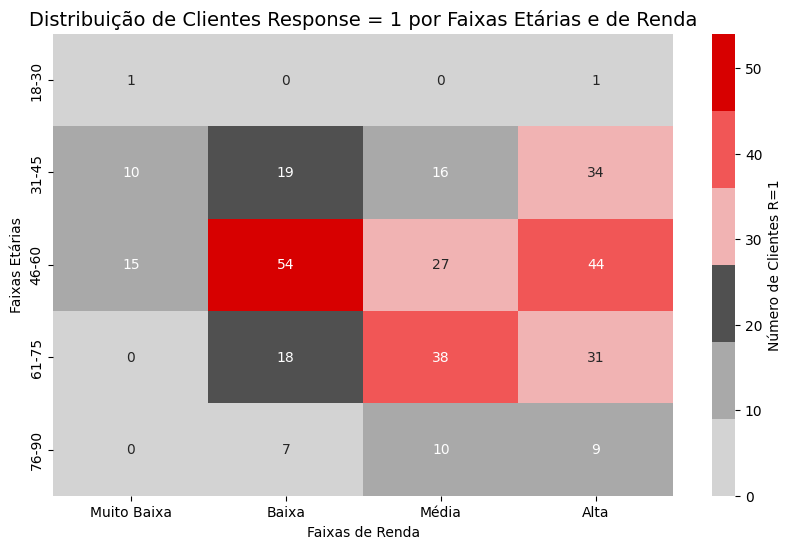

Income_Group  Muito Baixa  Baixa  Média  Alta
Age_Group                                    
18-30                   1      0      0     1
31-45                  10     19     16    34
46-60                  15     54     27    44
61-75                   0     18     38    31
76-90                   0      7     10     9

In [31]:
# RDistribuição de Clientes Response = 1 por Faixas Etárias e de Renda
df_gadget = df.loc[df['Response'] == 1].copy()

df_gadget['Age_Group'] = pd.cut(
    df_gadget['Age'],
    bins=[18, 30, 45, 60, 75, 90],
    labels=['18-30', '31-45', '46-60', '61-75', '76-90']
)

bins_renda = [0, 25000, 50000, 75000, float('inf')]
labels_renda = ['Muito Baixa', 'Baixa', 'Média', 'Alta']
df_gadget['Income_Group'] = pd.cut(
    df_gadget['Income'],
    bins=bins_renda,
    labels=labels_renda
)

heatmap_data = df_gadget.groupby(['Age_Group', 'Income_Group'], observed=True).size().unstack()

heatmap_data = heatmap_data.fillna(0).astype(int)

colors = ['#D3D3D3', '#A9A9A9', '#505050', '#F1B3B3', '#F15656', '#D70000']  # Paleta de cores

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap=sns.color_palette(colors, as_cmap=True),
    cbar_kws={'label': 'Número de Clientes R=1'}
)
plt.title('Distribuição de Clientes Response = 1 por Faixas Etárias e de Renda', fontsize=14)
plt.xlabel('Faixas de Renda')
plt.ylabel('Faixas Etárias')
plt.show()

heatmap_data


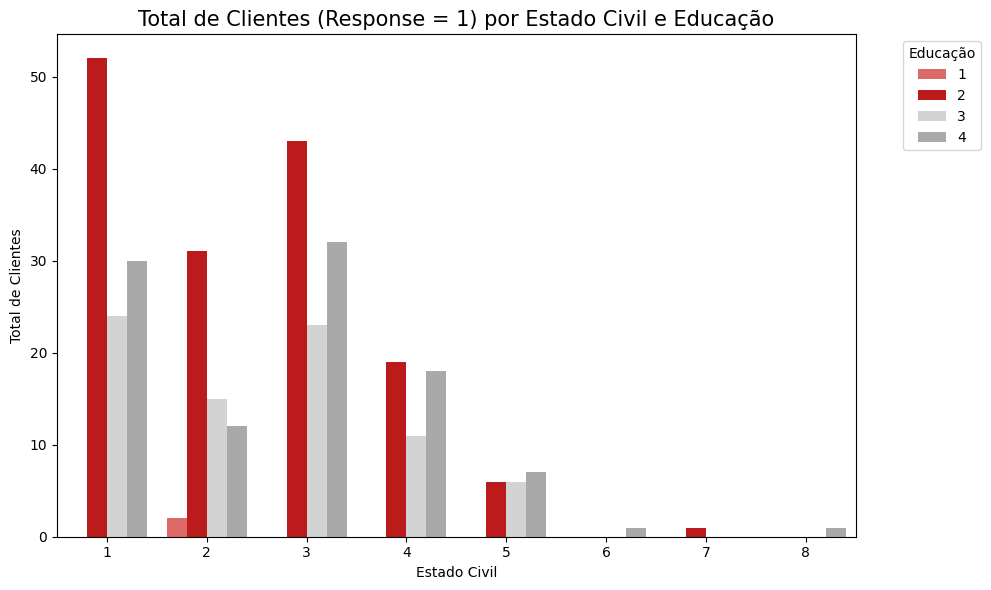

Marital_Status  Education  Total_Clients
0               1          2             52
1               1          3             24
2               1          4             30
3               2          1              2
4               2          2             31

In [32]:
#Total de Clientes (Response = 1) por Estado Civil e Educação

df_gadget = df[df['Response'] == 1]

grouped_data = df_gadget.groupby(['Marital_Status', 'Education']).size().reset_index(name='Total_Clients')

colors = [ '#F15656','#D70000', '#D3D3D3', '#A9A9A9']

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Marital_Status', y='Total_Clients', hue='Education', palette=colors)

plt.title('Total de Clientes (Response = 1) por Estado Civil e Educação', fontsize=15)
plt.xlabel('Estado Civil')
plt.ylabel('Total de Clientes')
plt.legend(title='Educação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

grouped_data.head()


 #### **Quais são os comportamentos de Compra?**

#####**Como a renda afeta os gastos nas categorias de produtos?**


* Existe uma tendência clara de aumento nos gastos à medida que a faixa de renda
sobe, especialmente nas categorias de vinhos, carne e produtos "gold".
Por exemplo, clientes na faixa de renda Muito Baixa gastam em média 13,78 em vinhos, enquanto na faixa Alta, o gasto sobe para 820,49.

* Os clientes com maior renda, especificamente na faixa Alta, tendem a gastar mais com produtos de luxo, como produtos "gold" (65,57), indicando que a renda está fortemente associada à compra de itens mais exclusivos e caros.

* Os clientes da faixa Média têm uma distribuição de gastos mais equilibrada entre diferentes categorias, com destaque para os gastos com carnes (343,71) e produtos de peixe (76,02), o que pode indicar uma maior diversificação nas compras à medida que a renda se torna mais estável.

* As categorias de produtos mais acessíveis, como frutas e doces, apresentam um crescimento mais modesto conforme a renda sobe.


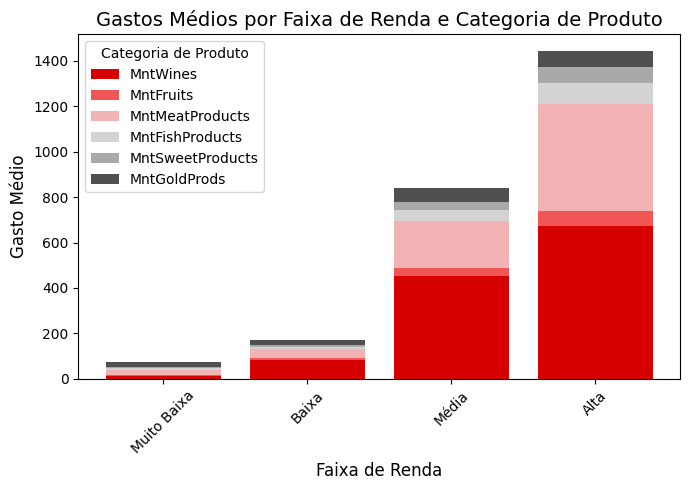

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Faixa_Renda                                                            
Muito Baixa   11.107438   6.095041        21.698347         7.892562   
Baixa         84.457772   7.069767        37.855569        11.664627   
Média        454.097561  35.231707       204.429268        48.248780   
Alta         673.645714  64.542857       470.305714        94.002857   

             MntSweetProducts  MntGoldProds  
Faixa_Renda                                  
Muito Baixa          6.326446     18.855372  
Baixa                7.206854     22.419829  
Média               35.276829     61.050000  
Alta                69.134286     72.534286

In [33]:
# Gastos Médios por Faixa de Renda e Categoria de Produto

bins = [0, 25000, 50000, 75000, float('inf')]
labels = ['Muito Baixa', 'Baixa', 'Média', 'Alta']

df['Faixa_Renda'] = pd.cut(df['Income'], bins=bins, labels=labels, ordered=True)

gastos_colunas = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[gastos_colunas] = df[gastos_colunas].apply(pd.to_numeric, errors='coerce')

gastos_medios = (
    df.groupby('Faixa_Renda', observed=False)[gastos_colunas]
    .mean()
    .reindex(labels)
)

categories = gastos_medios.columns
colors = ['#D70000', '#F15656', '#F1B3B3', '#D3D3D3', '#A9A9A9', '#505050']

# Criar gráfico
fig, ax = plt.subplots(figsize=(7, 5))
bottom_values = np.zeros(len(gastos_medios))

for idx, category in enumerate(categories):
    ax.bar(
        gastos_medios.index,
        gastos_medios[category],
        bottom=bottom_values,
        label=category,
        color=colors[idx % len(colors)]
    )
    bottom_values += gastos_medios[category]

ax.set_title('Gastos Médios por Faixa de Renda e Categoria de Produto', fontsize=14)
ax.set_xlabel('Faixa de Renda', fontsize=12)
ax.set_ylabel('Gasto Médio', fontsize=12)
ax.legend(title='Categoria de Produto', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

gastos_medios.head()


##### **Qual a relação entre idade/renda por canal de venda (web, loja, catálogo)?**

* Em geral, pessoas com maior renda tendem a comprar mais tanto pela web quanto nas lojas físicas, com uma presença significativa de compras via catálogo nas faixas de renda “Alta”.
* As compras online parecem ser mais populares em pessoas com maior renda (média e alta), tendo consumidores de baixa renda preferindo realizar comprar em lojas físicas.
* As faixas etárias mais jovens (Até 30 anos) tendem a ter um comportamento mais expressivo nas compras por web e loja, enquanto as faixas etárias mais velhas (Acima de 60 anos) possuem compras mais equilibradas, com um aumento nas compras via catálogo nas faixas de renda mais altas.


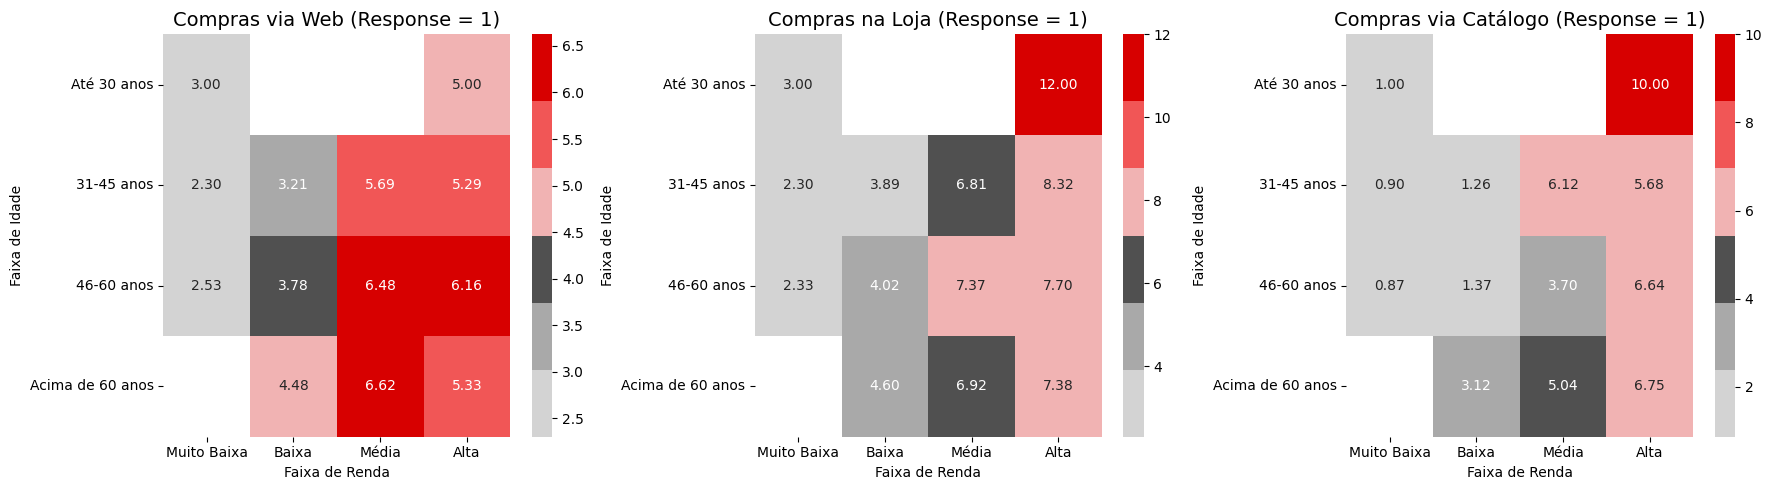

NumWebPurchases  NumStorePurchases  \
Faixa_Idade      Faixa_Renda                                       
Até 30 anos      Muito Baixa         3.000000           3.000000   
                 Baixa                    NaN                NaN   
                 Média                    NaN                NaN   
                 Alta                5.000000          12.000000   
31-45 anos       Muito Baixa         2.300000           2.300000   
                 Baixa               3.210526           3.894737   
                 Média               5.687500           6.812500   
                 Alta                5.294118           8.323529   
46-60 anos       Muito Baixa         2.533333           2.333333   
                 Baixa               3.777778           4.018519   
                 Média               6.481481           7.370370   
                 Alta                6.159091           7.704545   
Acima de 60 anos Muito Baixa              NaN                NaN   
                 Baixa               4.480000           4.600000   
                 Média               6.625000           6.916667   
                 Alta                5.325000           7.375000   

                              NumCatalogPurchases  
Faixa_Idade      Faixa_Renda                       
Até 30 anos      Muito Baixa             1.000000  
                 Baixa                        NaN  
                 Média                        NaN  
                 Alta                   10.000000  
31-45 anos       Muito Baixa             0.900000  
                 Baixa                   1.263158  
                 Média                   6.125000  
                 Alta                    5.676471  
46-60 anos       Muito Baixa             0.866667  
                 Baixa                   1.370370  
                 Média                   3.703704  
                 Alta                    6.636364  
Acima de 60 anos Muito Baixa                  NaN  
                 Baixa                   3.120000  
                 Média                   5.041667  
                 Alta                    6.750000

In [34]:
#Relação entre idade e renda por canal de venda (web, loja, catálogo) | (Response = 1)

df_filtered = df[df['Response'] == 1].copy()

bins_idade = [0, 30, 45, 60, float('inf')]
labels_idade = ['Até 30 anos', '31-45 anos', '46-60 anos', 'Acima de 60 anos']

bins_renda = [0, 25000, 50000, 75000, float('inf')]
labels_renda = ['Muito Baixa', 'Baixa', 'Média', 'Alta']

df_filtered.loc[:, 'Faixa_Idade'] = pd.cut(
    df_filtered['Age'], bins=bins_idade, labels=labels_idade, ordered=True
)
df_filtered.loc[:, 'Faixa_Renda'] = pd.cut(
    df_filtered['Income'], bins=bins_renda, labels=labels_renda, ordered=True
)

gastos_por_canal = df_filtered.groupby(['Faixa_Idade', 'Faixa_Renda'], observed=False)[
    ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
].mean()

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

canais = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
titulos = ['Compras via Web (Response = 1)', 'Compras na Loja (Response = 1)', 'Compras via Catálogo (Response = 1)']

colors = ['#D3D3D3', '#A9A9A9', '#505050', '#F1B3B3', '#F15656', '#D70000']

for i, canal in enumerate(canais):
    pivot_table = gastos_por_canal[canal].unstack()
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".2f",
        cmap=sns.color_palette(colors, as_cmap=True),
        ax=ax[i]
    )
    ax[i].set_title(titulos[i], fontsize=14)
    ax[i].set_xlabel('Faixa de Renda')
    ax[i].set_ylabel('Faixa de Idade')

plt.tight_layout()
plt.show()

gastos_por_canal


# **Segmentação de Clientes - Clusterização**

O objetivo desta etapa é realizar a segmentação de clientes para identificar grupos com características semelhantes, permitindo ações de marketing direcionadas e maximizando o potencial de sucesso da campanha. A segmentação foi construída com base na Análise Exploratória de Dados (EDA).

**Clusterização**

- Utilizou-se algoritmos como K-Means para agrupar clientes com características semelhantes.
- Além disso, foi aplicada a técnica de Análise de Componentes Principais (PCA) para redução de dimensionalidade.

**Validação dos Segmentos**

- A coerência dos grupos foi avaliada por métricas de clusterização, como silhueta.

**Análise dos Segmentos**

- Cada segmento foi descrito destacando suas principais características.
- Foi analisada a relação de cada grupo com a probabilidade de compra, identificando os segmentos mais promissores para a campanha.



#### **Clusterização**

Diversos fatores influenciam a capacidade do algoritmo de realizar agrupamentos bem definidos, como a qualidade e a quantidade dos atributos disponíveis. Por isso, esta etapa será iniciada com a criação de novos atributos que possam contribuir positivamente para o desempenho do modelo, seguida de uma análise de correlação abrangente em toda a base de dados.

*Features selecionadas com base na relevância:*   
- Income
- Children
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumCatalogPurchases
- NumStorePurchases
- NumWebPurchases
- NumWebVisitsMonth
- Response
- Shopping

In [35]:
df['Children'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
df['Shopping'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

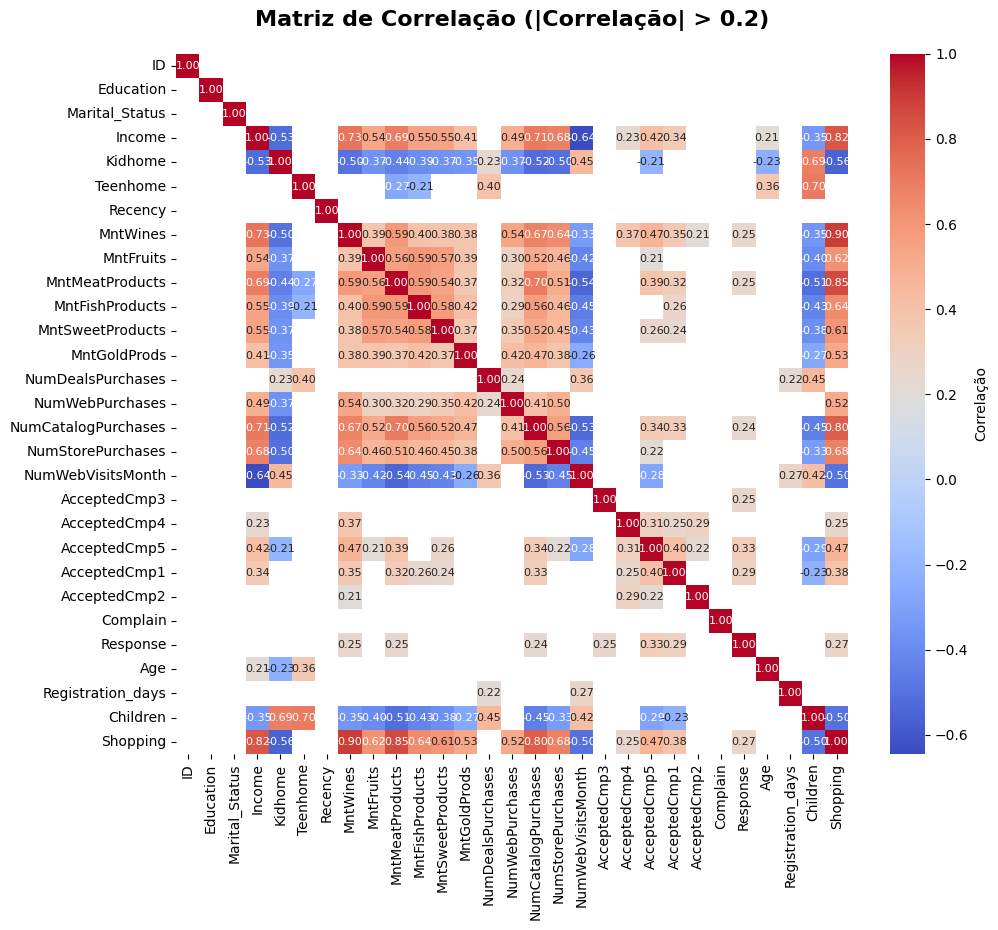

In [36]:
# Calculando a Matriz de Correlação (|Correlação| > 0.2)
correlation_matrix = df.corr(numeric_only=True)

filtered_matrix = correlation_matrix.where((correlation_matrix > 0.2) | (correlation_matrix < -0.2))

plt.figure(figsize=(12, 10))
sns.heatmap(
    filtered_matrix,
    annot=True,
    annot_kws={'size': 8},
    cmap='coolwarm',
    fmt=".2f",
    mask=filtered_matrix.isnull(),
    cbar_kws={'label': 'Correlação'}
)

plt.title('Matriz de Correlação (|Correlação| > 0.2)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.show()


##### **PCA**

A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade amplamente utilizada para simplificar conjuntos de dados complexos, preservando a maior quantidade possível de variação presente nos dados originais. O PCA é particularmente útil para eliminar redundâncias, reduzir ruídos e melhorar a eficiência de algoritmos de aprendizado de máquina, além de facilitar a visualização e interpretação de dados de alta dimensão.

A **variância acumulada** ajuda a determinar o número mínimo de componentes principais necessários para capturar uma proporção significativa da variância total, garantindo a eficiência do modelo ao reduzir a dimensionalidade sem comprometer informações importantes. Esse valor costuma estar em um intervalo aceitável de 70% a 95%.

Dessa forma, utilizando a variância acumulada como um guia para determinar o número de componentes principais, escolheu-se **n_components=4**, mantendo aproximadamente **75% da variância total**.

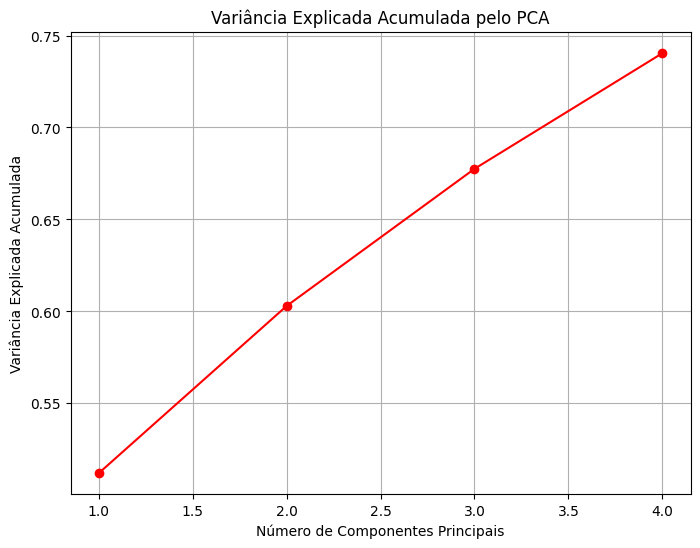

In [37]:
# Seleção de Variaveis e PCA
columns = [
    'Income', 'Children', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
    'NumWebVisitsMonth', 'Response', 'Shopping'
]

x = df[columns]

X = x.iloc[:, 0:15].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color = 'red')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada pelo PCA')
plt.grid(True)
plt.show()



##### **Metodo Elbow**

O método do elbow é utilizado para determinar o número ideal de clusters em algoritmos como o K-Means, analisando a inércia (soma das distâncias quadradas entre os pontos e os centros dos clusters) para diferentes valores de
k.

O grafico gerado indica uma diminuição acentuada da inércia até atingir um ponto de estabilização, formando um "cotovelo", com **k = 3**.

Número de clusters: 1, Inertia: 23103.90964450005
Número de clusters: 2, Inertia: 10424.004830572525
Número de clusters: 3, Inertia: 7889.311549114743
Número de clusters: 4, Inertia: 6827.19838594356
Número de clusters: 5, Inertia: 6229.519472750841
Número de clusters: 6, Inertia: 5628.046089435173
Número de clusters: 7, Inertia: 4842.080111744487
Número de clusters: 8, Inertia: 4481.416035652775
Número de clusters: 9, Inertia: 4113.159634588976
Número de clusters: 10, Inertia: 3823.7148077733414


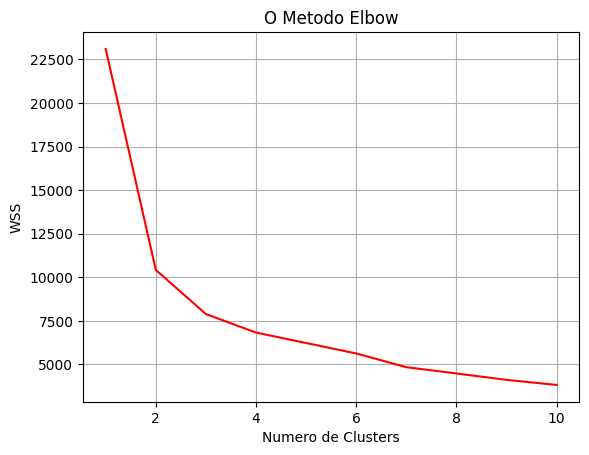

In [38]:
# Metodo Elbow
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=(0), n_init=1)
    kmeans.fit(X_pca)
    print(f"Número de clusters: {i}, Inertia: {kmeans.inertia_}")
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, color='red')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS')
plt.grid(True)
plt.show()

##### **K-Means**

O K-Means é um algoritmo de clusterização que divide os dados em
k clusters, minimizando a soma das distâncias quadradas entre os pontos e seus centróides. Inicia com a escolha aleatória de
k centros, atribui os dados aos centros mais próximos e recalcula os centróides. O processo se repete até a convergência, quando as mudanças nos centróides se tornam mínimas.

In [39]:
# Execução do K-Means, K = 3

kmeans = KMeans(n_clusters=3, random_state=0, n_init=1)
previsoes = kmeans.fit_predict(X_pca)

#### **Validação dos Segmentos**
O índice de silhueta mede a qualidade dos clusters, com valores variando de -1 a 1. O valor de **índice de silhueta = 0.408** obtido indica que os clusters formados pelo algoritmo são razoavelmente bem definidos, com uma separação moderada entre os grupos. A **inércia = 7889.31**, embora não seja muito baixa, sugere que a soma das distâncias quadradas está em um nível razoável, o que aponta para um agrupamento eficiente, com os pontos relativamente próximos aos seus centróides. Esses resultados indicam que a segmentação tem um bom potencial, com espaço para ajustes para aprimorar a separação dos clusters.

In [40]:
# Indice de silhueta
indice_silhueta = silhouette_score(X_pca, previsoes)

# Inércia
kmeans.fit(X_pca)
inercia = kmeans.inertia_

print(f"Índice de Silhueta: {indice_silhueta}")
print(f"Inércia: {inercia}")

Índice de Silhueta: 0.4088491409282297
Inércia: 7889.311549114743


#### **Análise dos Segmentos**

**Cluster 0: possui o maior número de clientes e taxa de conversão relativamente baixa (9,2%), o que sugere que o engajamento com esse grupo é menor.**

- Renda: Baixa, média de 35.282
- Número de Crianças: 1.25
- Gastos: Gastos moderados em vinhos (50), frutas (5), carne (25) e outros produtos, com ênfase em produtos doces (15) e compras em catálogo (0.59).
- Comportamento de Compra: Compras principalmente em lojas físicas (3.34) e pela web (2.25).
- Taxa de Resposta: Baixa (9.2%)
- Visitas ao site: 6.46 visitas/mês.

**Cluster 1: apresenta a maior taxa de conversão de clientes com response = 1, o que indica que esse grupo pode ser o mais receptivo ou propenso a ações da campanha.**

- Renda: Alta, com uma média de 75.608.
- Número de Crianças: Muito baixo (0.20).
- Gastos: Gastos altos em vinhos (613), carne (466), doces (78), e outros produtos.
- Comportamento de Compra: Alta frequência de compras, especialmente em catálogo (6.05) e lojas físicas (8.43).
- Taxa de Resposta: Alta (29.4%)
- Visitas ao site: 2.8 visitas/mês.

**Cluster 2: tem uma taxa de conversão intermediária (12,3%) e pode representar um grupo de clientes com características entre os clusters 0 e 1**

- Renda: Moderada, com média de 59.715.
- Número de Crianças: 1.09
- Gastos: Gastos mais baixos em vinhos (493), carne (145) e produtos doces (65).
- Comportamento de Compra: Frequência moderada em compras na loja física (7.98) e pela web (6.54).
- Taxa de Resposta: Baixa (12.3%)
- Visitas ao site: 5.6 visitas/mês.

In [41]:
x = df[columns].copy()
x.loc[:, 'Cluster'] = previsoes

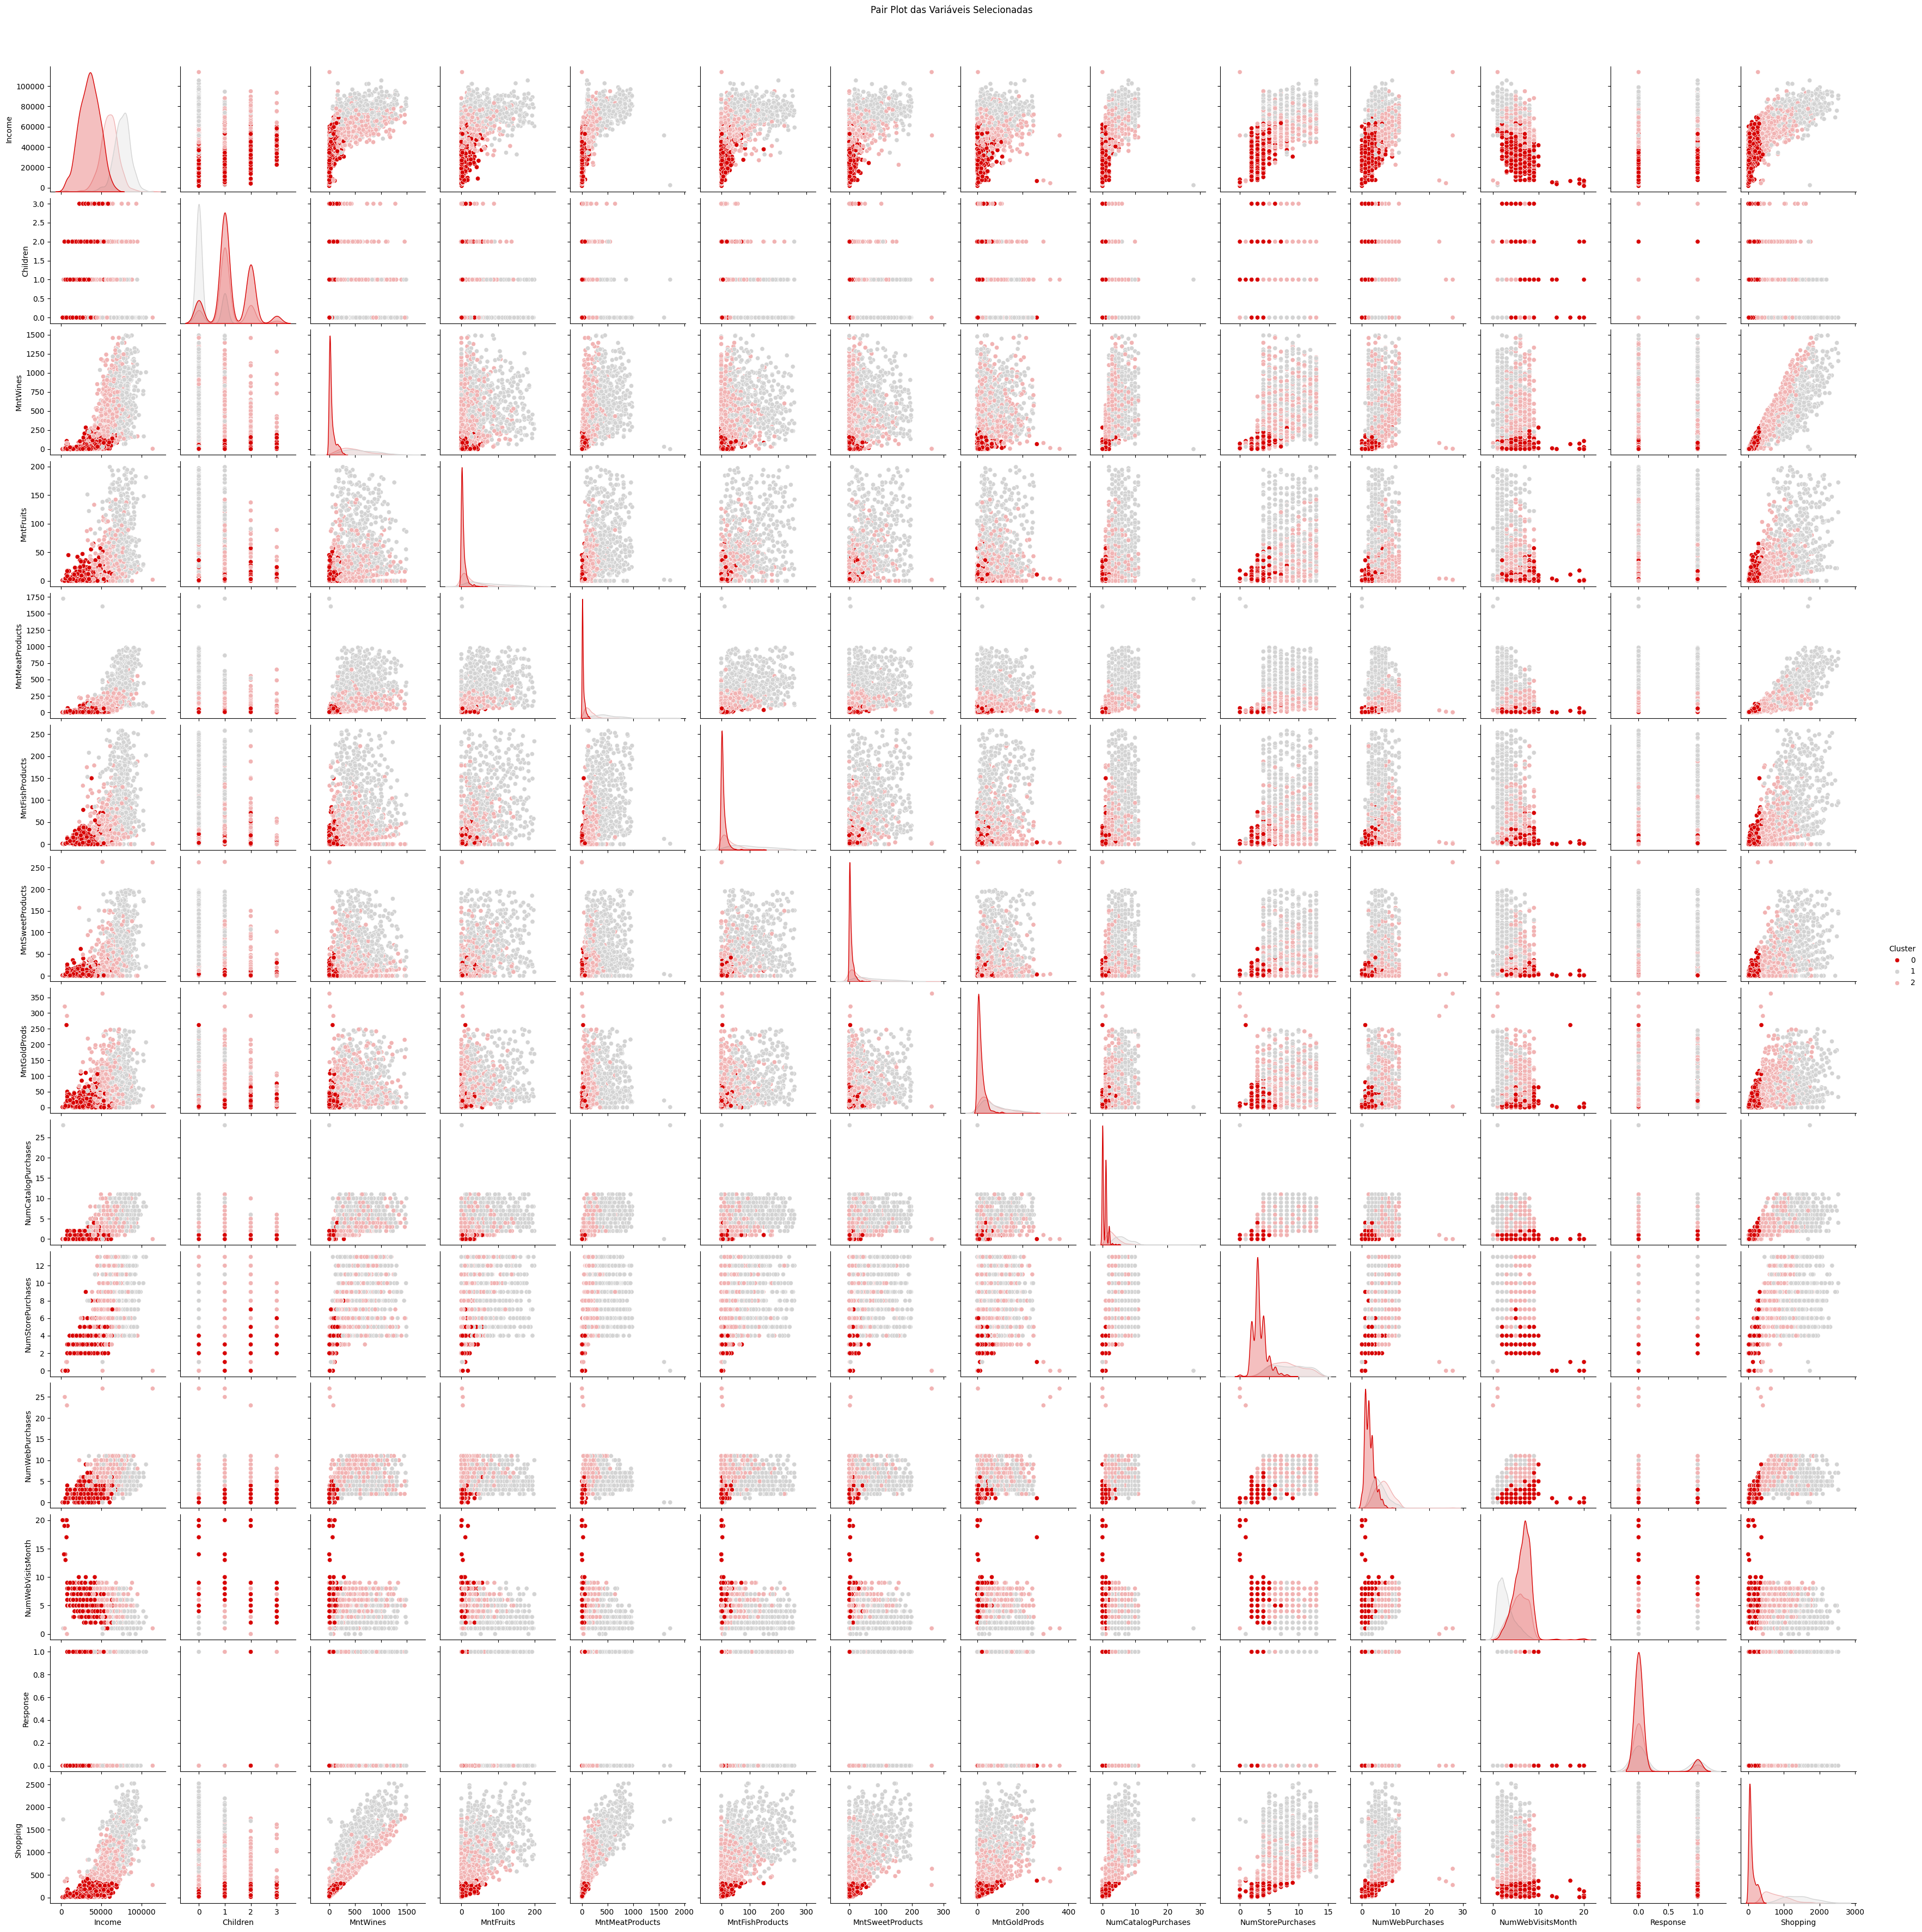

In [42]:
colors = ['#D70000', '#D3D3D3', '#F1B3B3']

sns.pairplot(x, hue='Cluster', palette=colors)
plt.suptitle('Pair Plot das Variáveis Selecionadas', y=1.02)
plt.show()

In [43]:
medias_por_cluster = x.groupby('Cluster').mean()

medias_por_cluster.head()

Income  Children    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                   
0        35281.827854  1.252055   50.041096   5.059361        25.153425   
1        75607.914234  0.204380  613.355839  71.306569       466.737226   
2        59715.250000  1.090444  493.023891  24.087031       145.226962   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumCatalogPurchases  \
Cluster                                                                         
0               7.397260          5.060274     15.652055             0.592694   
1             103.604015         73.156934     78.167883             6.045620   
2              32.474403         25.447099     65.448805             3.267918   

         NumStorePurchases  NumWebPurchases  NumWebVisitsMonth  Response  \
Cluster                                                                    
0                 3.345205         2.251142            6.46210  0.092237   
1                 8.428832         5.187956            2.79927  0.293796   
2                 7.976109         6.537543            5.59727  0.122867   

            Shopping  
Cluster               
0         108.363470  
1        1406.328467  
2         785.708191

In [44]:
# Adicionar as previsões ao DataFrame
df.loc[:, 'Cluster'] = previsoes

# Classificação


Foi realizado um processo de treinamento e avaliação de diferentes modelos de classificação para prever a variável Response. Primeiramente, as colunas relevantes foram selecionadas e separadas em características (X) e rótulo (y). O conjunto de dados foi dividido em treino e teste, com a aplicação de pesos amostrais com base nos clusters, ajustando a importância de cada grupo. A normalização foi aplicada aos dados de treino e teste usando o StandardScaler. Em seguida, foram testados modelos como Random Forest, SVM, Logistic Regression, Naive Bayes, Decision Tree e Gradient Boosting, treinando cada um com os dados normalizados e pesados. A acurácia foi calculada para cada modelo, e também foi realizada validação cruzada para avaliar a precisão dos resultados.

O **Random Forest** se destaca como o modelo mais robusto, apresentando a maior Acurácia (85.65%), AUC-ROC (82.74%) e CV Acurácia (96.66%), além de um excelente desempenho geral e em generalização. O SVM (63.08%) e o Logistic Regression (70.77%) se destacam pelo bom recall, sendo eficazes na captura da classe positiva, enquanto o Decision Tree oferece um bom equilíbrio entre recall e precisão, com desempenho mais estável. Com base nesses resultados, o Random Forest é o modelo mais indicado para tarefas de classificação, enquanto o SVM e o Logistic Regression podem ser aprimorados para melhorar a precisão sem perder muito recall.

In [47]:
columns = [
    'Income', 'Education', 'Children', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
    'NumWebVisitsMonth', 'Age', 'Response', 'Cluster'
]

x = df[columns]

X = x.drop(columns='Response')
y = x['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicando oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),  # Necessário para calcular o AUC-ROC
    'Logistic Regression': LogisticRegression(max_iter=2000, solver='liblinear', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():

    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    print(f'{name} - Accuracy: {accuracy:.4f}')
    print(f'{name} - Recall: {recall:.4f}')
    print(f'{name} - Precision: {precision:.4f}')
    print(f'{name} - F1-Score: {f1:.4f}')
    print(f'{name} - AUC-ROC: {auc_roc:.4f}')


    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f'{name} - CV Accuracy: {cv_scores.mean():.4f}')

    print('--------------------------------')


Random Forest - Accuracy: 0.8565
Random Forest - Recall: 0.3231
Random Forest - Precision: 0.5122
Random Forest - F1-Score: 0.3962
Random Forest - AUC-ROC: 0.8274
Random Forest - CV Accuracy: 0.9666
--------------------------------
SVM - Accuracy: 0.7556
SVM - Recall: 0.6308
SVM - Precision: 0.3254
SVM - F1-Score: 0.4293
SVM - AUC-ROC: 0.8067
SVM - CV Accuracy: 0.8167
--------------------------------
Logistic Regression - Accuracy: 0.7242
Logistic Regression - Recall: 0.7077
Logistic Regression - Precision: 0.3067
Logistic Regression - F1-Score: 0.4279
Logistic Regression - AUC-ROC: 0.7965
Logistic Regression - CV Accuracy: 0.7206
--------------------------------
Naive Bayes - Accuracy: 0.7063
Naive Bayes - Recall: 0.6462
Naive Bayes - Precision: 0.2800
Naive Bayes - F1-Score: 0.3907
Naive Bayes - AUC-ROC: 0.7285
Naive Bayes - CV Accuracy: 0.6331
--------------------------------
Decision Tree - Accuracy: 0.8341
Decision Tree - Recall: 0.4308
Decision Tree - Precision: 0.4308
Decision T

#### Random Forest

O Random Forest é um modelo de aprendizado supervisionado baseado em múltiplas árvores de decisão. Ele cria várias árvores utilizando diferentes subconjuntos dos dados e combina suas previsões para melhorar a precisão e reduzir o overfitting.

Para melhorar os resultados do modelo, diversas abordagens foram aplicadas. Primeiramente, foi aplicado o **oversampling com o RandomOverSampler**, equilibrando as classes no conjunto de treinamento, o que é crucial em problemas com desbalanceamento de classes. Além disso, o modelo foi ajustado com o parâmetro **class_weight='balanced'**, que também visa compensar o desbalanceamento. Para melhorar o recall, foi feito um ajuste no **threshold** de decisão, diminuindo-o para **0.4**, o que favoreceu a previsão da classe positiva. Dessa forma, dobramos o valor de  Recall de 0.3 para 0.6.

In [50]:
columns = [
    'Income', 'Education', 'Children', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
    'NumWebVisitsMonth', 'Age', 'Response', 'Cluster'
]

x = df[columns]

X = x.drop(columns='Response')
y = x['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

model = RandomForestClassifier(n_estimators=100, max_depth=11,class_weight='balanced', random_state=42)

model.fit(X_train_resampled, y_train_resampled)

y_prob = model.predict_proba(X_test_scaled)[:, 1]

threshold = 0.4

y_pred = (y_prob >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

print(f'Random Forest - Accuracy: {accuracy:.4f}')
print(f'Random Forest - Recall: {recall:.4f}')
print(f'Random Forest - Precision: {precision:.4f}')
print(f'Random Forest - F1-Score: {f1:.4f}')
print(f'Random Forest - AUC-ROC: {auc_roc:.4f}')

# cross-validation
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f'Random Forest - CV Accuracy: {cv_scores.mean():.4f}')


Random Forest - Accuracy: 0.8161
Random Forest - Recall: 0.6000
Random Forest - Precision: 0.4105
Random Forest - F1-Score: 0.4875
Random Forest - AUC-ROC: 0.8213
Random Forest - CV Accuracy: 0.9518


#### **Taxa de Sucesso da Próxima Campanha**
Com base nas métricas fornecidas para o modelo de Random Forest (Accuracy: 0.8587, Recall: 0.60, Precision: 0.4105), podemos recalcular as estimativas de receita para a próxima campanha de marketing se utiliziar o modelo montado.

***Estimativa de Clientes Selecionados***

Para estimar quantos clientes o modelo identificará como potenciais compradores, utilizaremos a precisão do modelo.

- Precisão (0.4105): Significa que, entre os clientes selecionados pelo modelo, 41,05% realmente efetuam a compra.

- Total de clientes da campanha (baseado no número da campanha anterior): 2.240.

- Clientes selecionados pelo modelo: 41,05% de 2.240 = 918,8 clientes.

- Clientes que realmente compram (segundo o recall de 60%): 60% de 918,8 = 551,3 compradores (aproximadamente 551 compradores).

***Estimativa de Receita***

- Com base na receita gerada por cada comprador (11 MU por cliente), podemos calcular a receita estimada:

- Receita estimada: 551 compradores x 11 MU = **6.061 MU**.

 A campanha anterior gerou 3.674 MU, enquanto a estimativa de receita para esta campanha, com base no modelo de Random Forest, é 6.061 MU, indicando um aumento significativo na receita projetada.



#### **Conclusão**
O modelo Random Forest está fazendo um trabalho razoável em termos de precisão geral, mas o recall pode ser melhorado, especialmente em cenários de desbalanceamento de classes, onde o objetivo é capturar mais instâncias positivas.

A AUC-ROC é alta, indicando que o modelo tem uma capacidade razoável de discriminar entre as classes. O modelo está com um desempenho aceitável em validação cruzada, sugerindo que ele generaliza bem para dados não vistos durante o treinamento.


***Oportunidades de Melhoria:***

**Uso do Cluster para Melhoria do Modelo**

A clusterização prévia dos dados, com base no comportamento do cliente, já mostrou que a coluna Cluster = 1 possui uma maior propensão para a variável response = 1 (comprar o produto). Essa informação pode ser utilizada para melhorar ainda mais o desempenho do modelo de Random Forest:

- ***Ajuste de Peso para Clusters Específicos***: Com a identificação dos clusters, é possível ajustar os pesos do modelo para favorecer a previsão da classe de interesse, especialmente para o cluster com maior taxa de conversão.

- ***Estratificação por Cluster***: Uma estratégia eficaz pode ser a segmentação do modelo em sub-modelos específicos para cada cluster. Isso permitiria uma previsão mais precisa, adaptada a cada comportamento identificado no processo de clusterização. A segmentação por cluster ajuda o modelo a identificar as nuances de cada grupo de clientes, otimizando o desempenho geral.

